<a href="https://colab.research.google.com/github/itsvivianjoseph/A-SIMPLE-TO-DO-LIST-APPLICATION/blob/master/Clothing_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('/content/Women Dresses Reviews Dataset .csv')

In [79]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


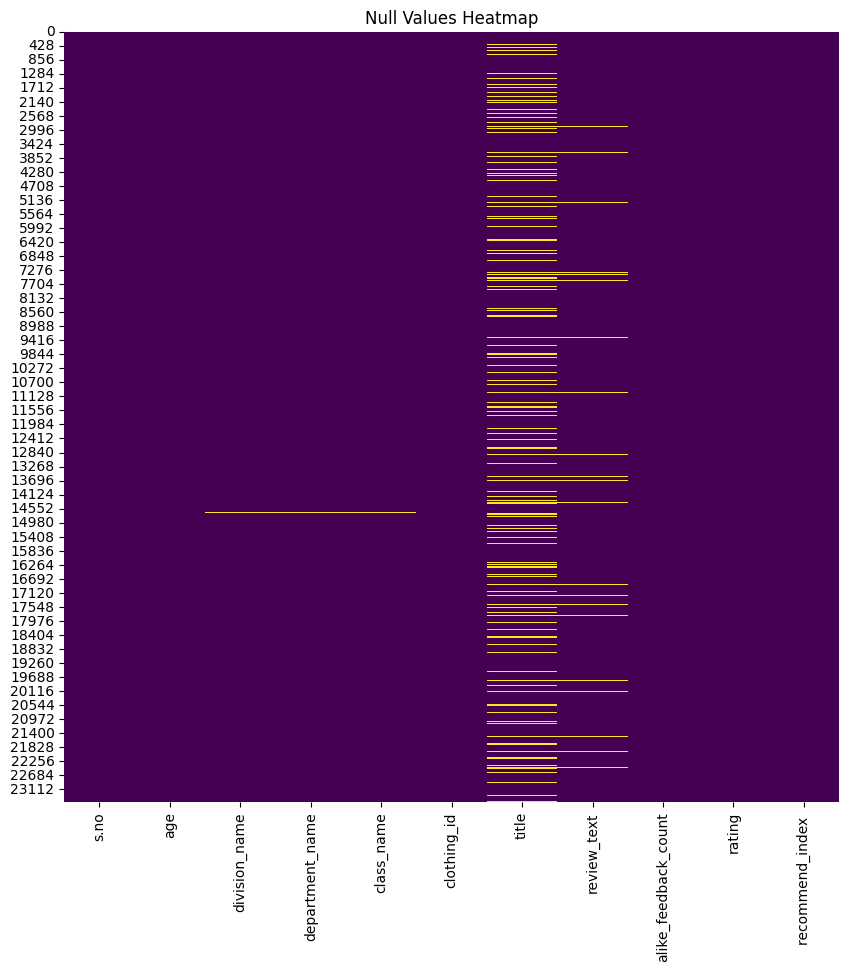

In [80]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [81]:
selected_columns = ['department_name', 'class_name', 'review_text', 'rating']
selected_df = df[selected_columns]

In [82]:
selected_df.rename(columns={'rating': 'sentiment_class'}, inplace=True)

<ipython-input-82-31e0715bfa48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns={'rating': 'sentiment_class'}, inplace=True)


In [83]:
selected_df

,department_name,class_name,review_text,sentiment_class
0,Bottoms,Jeans,Like other reviewers i was hesitant to spend t...,5
1,Tops,Blouses,As is true of a bunch of the fall clothing pho...,5
2,Bottoms,Skirts,"I so wanted this skirt to work, love the desig...",1
3,Bottoms,Pants,Love love this! i was hesitant to buy this at ...,5
4,Intimate,Swim,I absolutely love the retro look of this swims...,5
...,...,...,...,...
23481,Dresses,Dresses,I oot this dress in the blue. it fits great--h...,5
23482,Dresses,Dresses,I was very patient with this dress. i was wait...,5
23483,Tops,Knits,"The deep v doesn't gape, and flatters the neck...",5
23484,Dresses,Dresses,"I saw this dress online this morning, went int...",5


In [84]:
selected_df = selected_df.dropna()

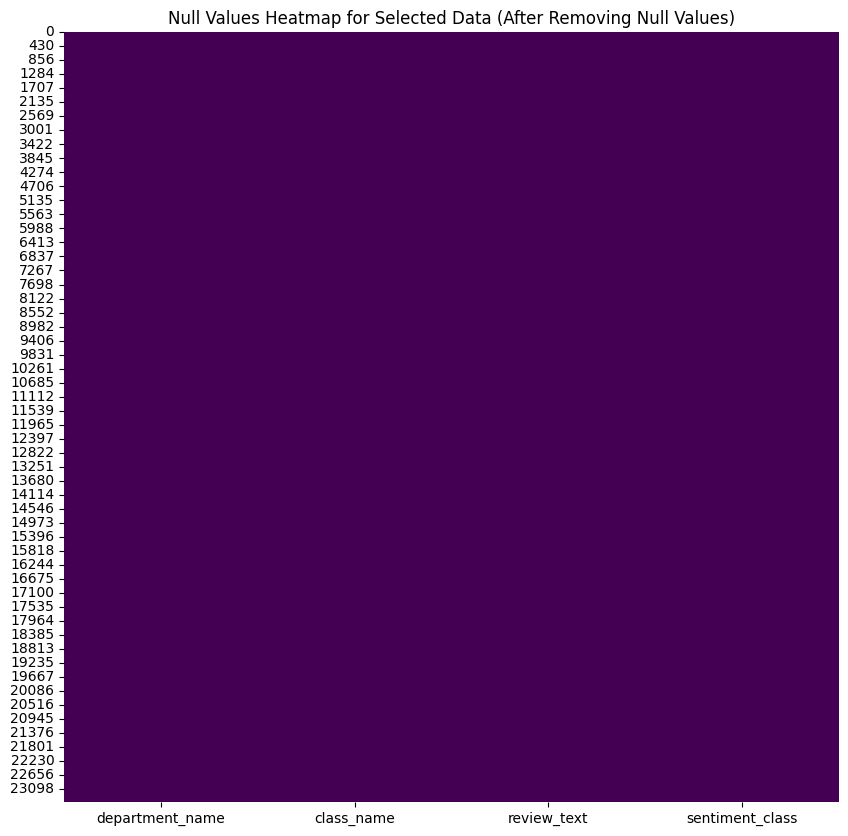

In [85]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap for Selected Data (After Removing Null Values)')
plt.show()

In [86]:
selected_df.shape

(22628, 4)

In [87]:
selected_df.head()

,department_name,class_name,review_text,sentiment_class
0,Bottoms,Jeans,Like other reviewers i was hesitant to spend t...,5
1,Tops,Blouses,As is true of a bunch of the fall clothing pho...,5
2,Bottoms,Skirts,"I so wanted this skirt to work, love the desig...",1
3,Bottoms,Pants,Love love this! i was hesitant to buy this at ...,5
4,Intimate,Swim,I absolutely love the retro look of this swims...,5


In [88]:
# for index, row in selected_df.iterrows():
#     sentiment_class = row['sentiment_class']
#     print(sentiment_class)

In [89]:
sentiment_mapping = {
    5: 'strongly positive',
    4: 'mildly positive',
    3: 'neutral',
    2: 'mildly negative',
    1: 'strongly negative'
}

selected_df['sentiment_class'] = selected_df['sentiment_class'].replace(sentiment_mapping)

<ipython-input-89-b6434013d846>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['sentiment_class'] = selected_df['sentiment_class'].replace(sentiment_mapping)


In [90]:
selected_df

,department_name,class_name,review_text,sentiment_class
0,Bottoms,Jeans,Like other reviewers i was hesitant to spend t...,strongly positive
1,Tops,Blouses,As is true of a bunch of the fall clothing pho...,strongly positive
2,Bottoms,Skirts,"I so wanted this skirt to work, love the desig...",strongly negative
3,Bottoms,Pants,Love love this! i was hesitant to buy this at ...,strongly positive
4,Intimate,Swim,I absolutely love the retro look of this swims...,strongly positive
...,...,...,...,...
23481,Dresses,Dresses,I oot this dress in the blue. it fits great--h...,strongly positive
23482,Dresses,Dresses,I was very patient with this dress. i was wait...,strongly positive
23483,Tops,Knits,"The deep v doesn't gape, and flatters the neck...",strongly positive
23484,Dresses,Dresses,"I saw this dress online this morning, went int...",strongly positive


In [91]:
def construct_prompt(row):
    prompt = f"""
        You are a sales strategist tasked with improving sales for a specific product.
        The product is from the {row['department_name']} department and belongs to the {row['class_name']} class.
        Here's a review of the product: "{row['review_text']}".
        The sentiment class for this product is {row['sentiment_class']}.

        Generate a sales strategy consisting of 5 points to improve sales for this product.
        Include strategies that leverage the product's features, customer sentiment, and market trends.
        Make sure each point is actionable and provides a detailed explanation.
        """

    return prompt

In [ ]:
# implement this based on the gemma model
def generate_rec(selected_model,prompt):
  pass

In [ ]:
selected_model = ''

def generate_recommendations_for_row(row):
    prompt = construct_prompt(row)
    recommendations = generate_rec(selected_model, prompt)
    return recommendations

# Apply the function to each row of the DataFrame
selected_df['recommendations'] = selected_df.apply(generate_recommendations_for_row, axis=1)

selected_df